# Heap sorts

This file demonstrates data on the performance of various heap-based sorting algorithms. The following algorithms were used:

- Binary-heap-based heap sort
- d-heap-based heap sort (for d in { 5, 10, 25, 50, 100, 200, 300, 400, 500, 1000 })
- Optimized d-heap-based sort (children of each node form a heap)

## Testing methods
- Each algorithm was tested on random data with sample size ranging from $10^5$ to $10^7$ with step size of $10^5$.
- Each test was performed 5 times and the average time was taken as a result.
- Seed for random number generator was created once and reused for each algorithm, which guarantees that the same array was generated for each algorithm.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csv_files = ["results/heap_sort.csv"]
df = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index=True)
df = df.pivot(index="Sample Size", columns="Algorithm", values="Elapsed Time (ms)")
print(df.head(3))

Algorithm    HeapHeapSort10  HeapHeapSort100  HeapHeapSort1000  \
Sample Size                                                      
100000                   20               21                23   
200000                   38               40                44   
300000                   58               62                67   

Algorithm    HeapHeapSort200  HeapHeapSort25  HeapHeapSort300  \
Sample Size                                                     
100000                    21              20               21   
200000                    42              37               46   
300000                    65              57               73   

Algorithm    HeapHeapSort400  HeapHeapSort5  HeapHeapSort50  HeapHeapSort500  \
Sample Size                                                                    
100000                    22             19              20               23   
200000                    44             41              37               45   
300000                 

## Heap sort performance

Here you can see the data on the performance of various heap-based sorting algorithms.

<Axes: title={'center': 'Heap Sorts Performance (log scale)'}, xlabel='Sample Size', ylabel='Elapsed Time (ms)'>

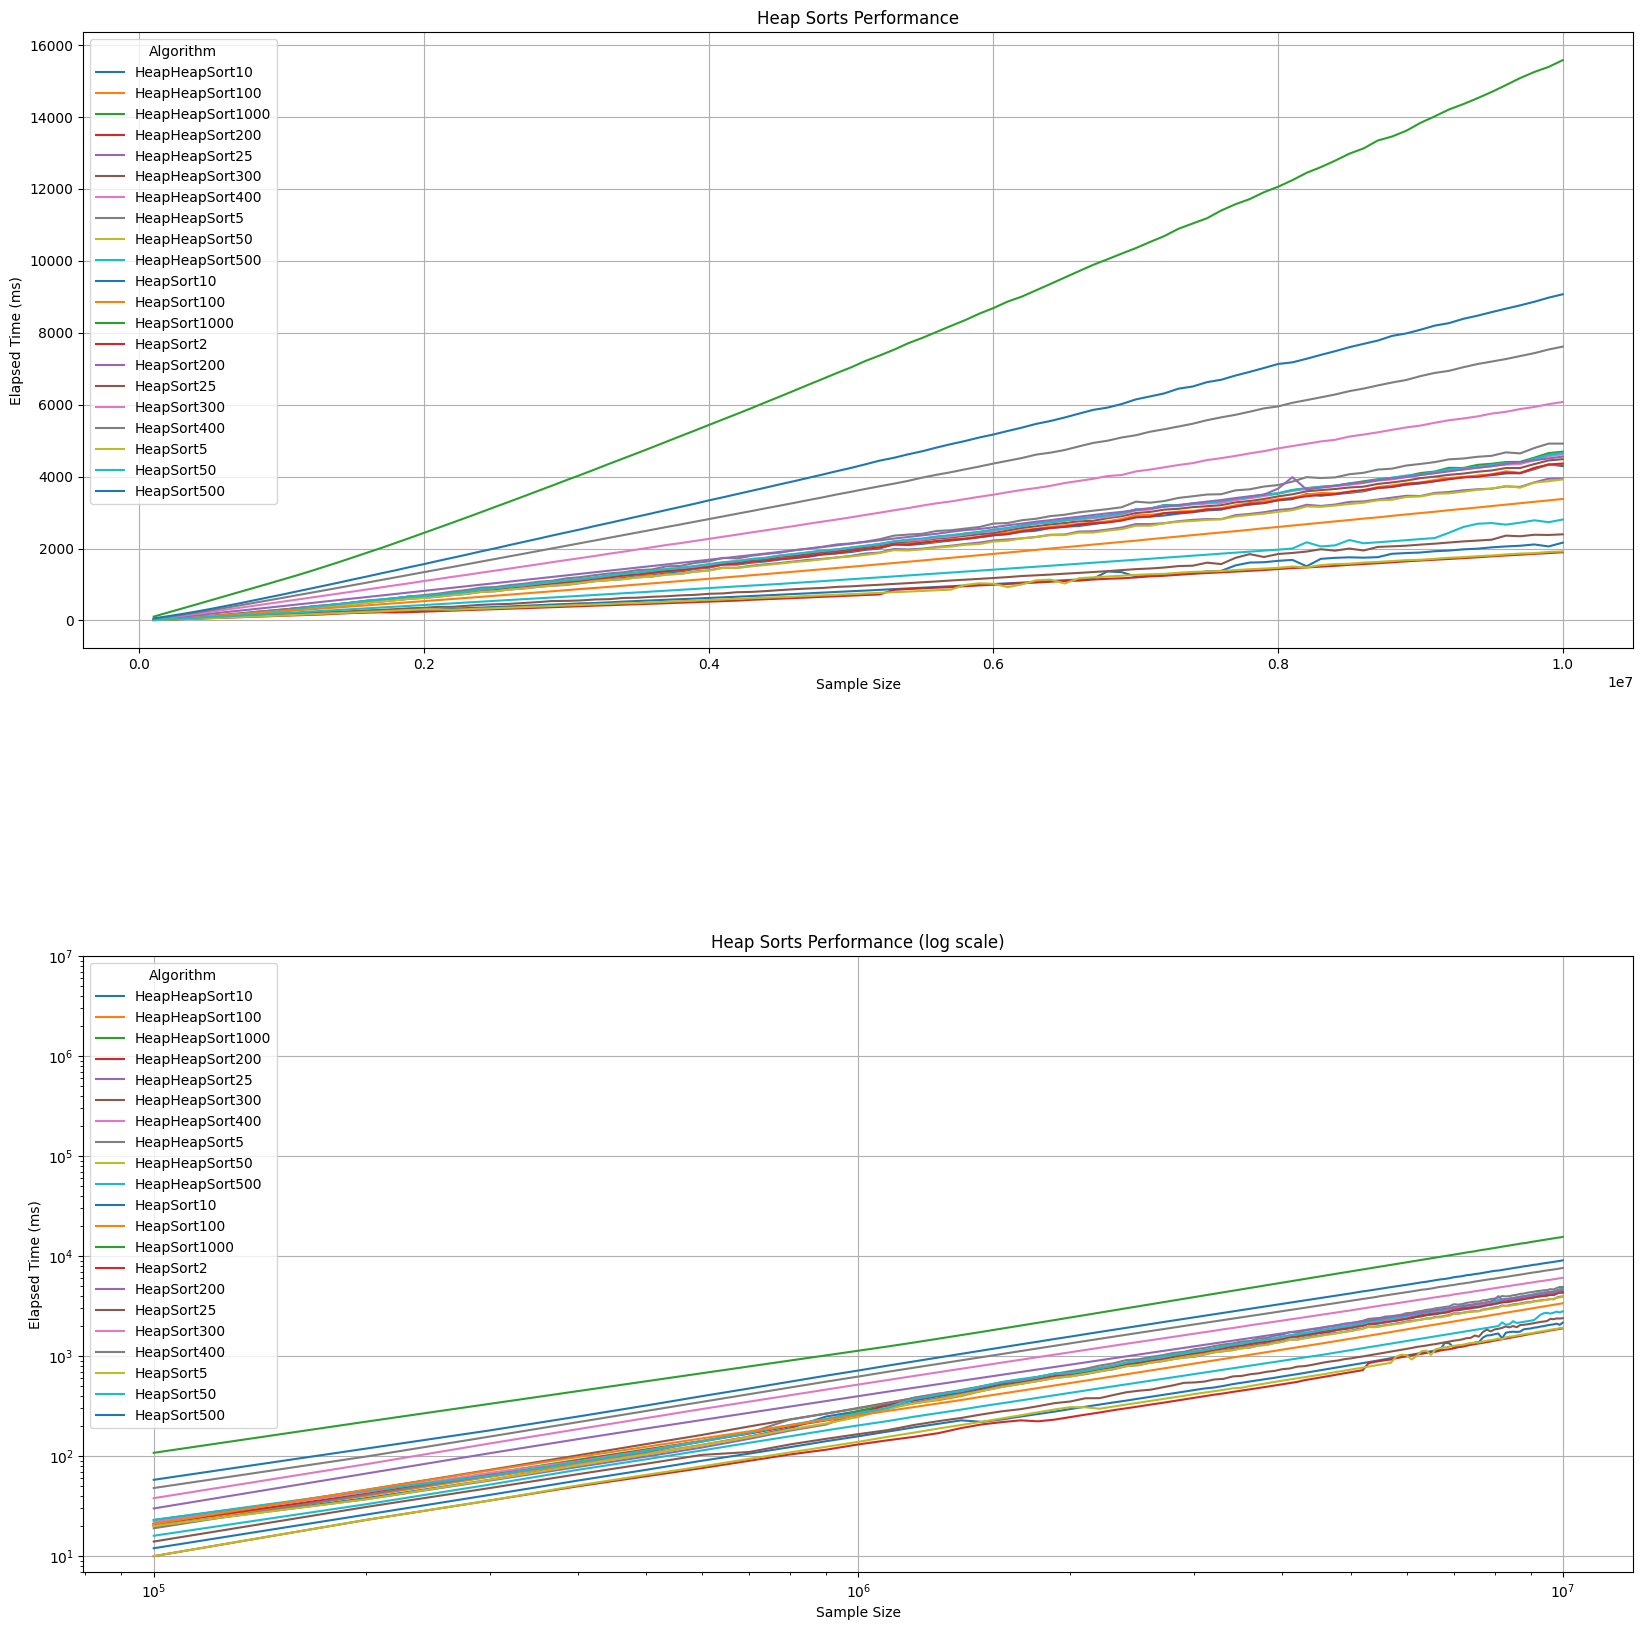

In [3]:
figure, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))
linear_scale, log_scale = axes
figure.subplots_adjust(hspace=0.5)
df.plot(
        ax=linear_scale,
        ylabel="Elapsed Time (ms)",
        title="Heap Sorts Performance",
        grid=True)
df[df.values > 0].plot(
        ax=log_scale,
        loglog=True,
        ylabel="Elapsed Time (ms)",
        title="Heap Sorts Performance (log scale)",
        yticks=np.logspace(1, 7, 7, base=10),
        grid=True)

Here is the performance data of only the optimized heaps.

<Axes: title={'center': 'Heap Sorts Performance (log scale)'}, xlabel='Sample Size', ylabel='Elapsed Time (ms)'>

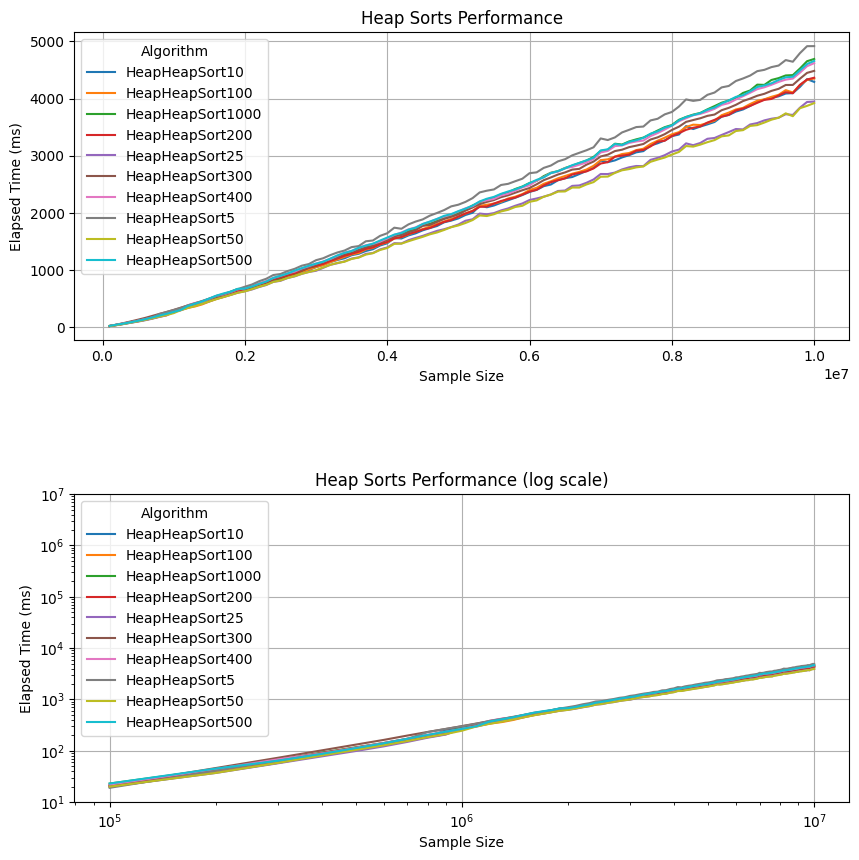

In [4]:
figure, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
linear_scale, log_scale = axes
figure.subplots_adjust(hspace=0.5)
hh_df = df[[col for col in df.columns if "HeapHeap" in col]]
hh_df.plot(
        ax=linear_scale,
        ylabel="Elapsed Time (ms)",
        title="Heap Sorts Performance",
        grid=True)
hh_df[hh_df.values > 0].plot(
        ax=log_scale,
        loglog=True,
        ylabel="Elapsed Time (ms)",
        title="Heap Sorts Performance (log scale)",
        yticks=np.logspace(1, 7, 7, base=10),
        grid=True)

As we can see, the various d-heap-based heap sort algorithms seem to behave similarly, however their performance seems to worsen significantly with increasing values of $d$. The best performance is achieved with binary heap.

Children-heap-optimized versions of d-heap all behave very similarly and are about as fast as non-optimized d-heap for $d=200$. Given that binary heap still outperforms d-heap, both optimized and not, this optimization does not seem to provide any actual performance gain, while requiring non-trivial implementation to achieve the time complexity of $O(n\log_k n \log k)$. Moreover, for values of $d$ below 200, the optimized version is noticeably slower. Furthermore, the optimized implementation requires $O(n)$ additional memory split in two separate arrays, which reduces cache-friendliness of the algorithm, eliminates the 'in-place' property of heap sort and introduces time overhead for memory allocation and copying.

## Conclusions

The heap-based sorts do not seem to present the researchers with a wide range of valuable optimizations. Increasing the values of $d$ for d-heaps has a noticeable negative effect on the performance of an algorithm. While the optimization of organizing the d-heap children nodes in a binary heap seems logical, the actual performance gain is only present for values of $d$ greater than 200, while for values below that, the performance is actually worsened with the introduction of the optimization.

The fastest heap sort algorithm can therefore be implemented with a simple binary heap. This algorithm is concise, easy to implement and debug, and is able to sort an array non-recursively and in-place (without additional memory) while maintaining $O(n \log n)$ time complexity. Any attempted optimizations of this algorithm have proved themselves to be redundant, with their implementation being time-consuming and error-prone.